# Исследование надежности заемщиков


## Загрузка данных

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Выведем количество пропущенных значений для каждого столбца.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

In [6]:

data['days_employed'] = data['days_employed'].abs()

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Выведем перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедимся, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

**Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Убедимся, что все пропуски заполнены.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Обработаеме неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Создадим столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Создади функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.



In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Исследование данных

#### Зависимость между количеством детей и возвратом кредита в срок?

           debt      
          count   sum
children             
0         14091  1063
1          4808   444
2          2052   194
3           330    27
4            41     4
5             9     0
children
5    0.000000
0    0.075438
3    0.081818
1    0.092346
2    0.094542
4    0.097561
Name: debt, dtype: float64


<AxesSubplot:xlabel='children', ylabel='debt'>

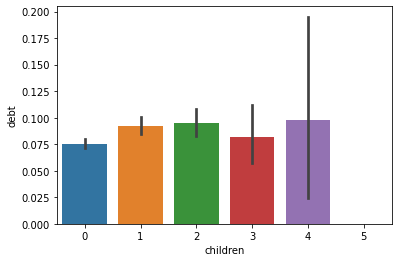

In [22]:


print(data.groupby('children').agg({'debt': ['count', 'sum']}))
print(data.groupby('children')['debt'].mean().sort_values()) 

#выведем %% отношение кредитов с просрочкой к общему количеству кредиов в категорияях по наличию детей

import seaborn

seaborn.barplot(x = data['children'], y = data['debt'])

**Вывод:** если смотреть на абсолютные показатели наличия просроченных кредитов по категориям количества детей может показаться, что количество просроченных кредитов уменьшается с ростом количества детей, а наибольшее количество просрочек у кого детей нет, но если взглянуть на отностительные величины станет ясно, что доля просроченных кредитов без детей 7,5%, далее по возрастающей 3е детей - 8,2%, 2е детей - 9,2%. 1 ребенок - 9,45%, 4 ребенка - 9,75%. 5 детей - 0% При этом стоит учитывтаь, что выборка для 5-ти детей всего 9, что недостаточно для того, чтобы делать вывдоды.Как видно, зависимость не линейная. 
Уменьшение количества кредитов, в т.ч. просроченных в абсолютном выражении с ростом количества детей может быть связано с более осторожным подходом в принятии решения о получении кредита и возможными рисками при его наличии, а рост в относительном выражении говорит о том, что при наличии 1-2 и 4 детей выше вероятность того, что в первую очередь при возникновении финансовых сложностей обязательства по своевременному погашению кредита будут принимать меньший приоритет перед обеспечением иных потребностей таких людей в частности это могут быть продукты питания, одежда и т.п. для детей. Экспертным путем присвоим ретинг для каждой категории в зависимости от доли просроченных кредитов: максимальная доля просрочки имеет рейтинг 0, минимальный - 4. Чем выше ретинг тем вероятность просрочки ниже.

In [23]:
def rating_children(children):
    try:
        if children == 0:
            return 4
        elif children == 1:
            return 2
        elif children == 2:
            return 1
        elif children == 3:
            return 3
        elif children >= 4:
            return 0
    except:
        pass 
data['rating_children'] = data['children'].apply(rating_children) 

#print(data.head(5))

#### Зависимость между семейным положением и возвратом кредита в срок?

                        debt     
                       count  sum
family_status                    
Не женат / не замужем   2796  273
в разводе               1189   84
вдовец / вдова           951   63
гражданский брак        4134  385
женат / замужем        12261  927
family_status
вдовец / вдова           0.066246
в разводе                0.070648
женат / замужем          0.075606
гражданский брак         0.093130
Не женат / не замужем    0.097639
Name: debt, dtype: float64


<AxesSubplot:xlabel='family_status', ylabel='debt'>

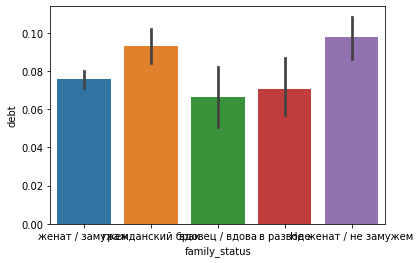

In [24]:


print(data.groupby('family_status').agg({'debt': ['count', 'sum']})) #выведем количество кредитов и сумму кредитов с просрочкой по категориям
print(data.groupby('family_status')['debt'].mean().sort_values()) #выведем %% отношение кредитов с просрочкой к общему количеству кретиов семейному статусу

seaborn.barplot(x = data['family_status'], y = data['debt'])

**Вывод:** наибольшее количество кредитов имеют семейные пары, в в т.ч. находящиеся в гражданском браке, далее неженатые/незамужние и разведенные, наименьшее количество кредитов имеют вдовцы. Лучшее качество погащения демоенстрирует наименьшшая категория - вдовцы с долей просрочки 6,6%, далее по восходяшей разведенные и состоящие в браке с долями прочрочек 7,0% и 7,6% соответственно. Наибольша доля просроек наблюдается у категорий находящиеся в гражлансокм браке и неженатые/незамужние с долей прсрочек 9,3% и 9,7% соответственно. Аналогично категориям по наличию детей присвоим ретинг для каждой категории в зависимости от доли просроченных кредитов: максимальная доля просрочки имеет рейтинг 0, минимальный - 4. Чем выше ретинг тем вероятность просрочки ниже.

In [25]:
def rating_family_status(family_status):
    try:
        if family_status == 'вдовец / вдова':
            return 4
        elif family_status == 'в разводе':
            return 3
        elif family_status == 'женат / замужем':
            return 2
        elif family_status == 'гражданский брак':
            return 1
        elif family_status == 'Не женат / не замужем':
            return 0
    except:
        pass 
data['rating_family_status'] = data['family_status'].apply(rating_family_status) 

#print(data.head(5))

#### Зависимость между уровнем дохода и возвратом кредита в срок?

                        debt      
                       count   sum
total_income_category             
A                         25     2
B                       5014   354
C                      15921  1353
D                        349    21
E                         22     2
total_income_category
D    0.060172
B    0.070602
A    0.080000
C    0.084982
E    0.090909
Name: debt, dtype: float64


<AxesSubplot:xlabel='total_income_category', ylabel='debt'>

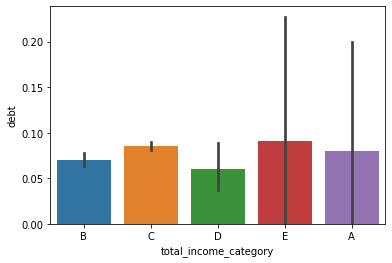

In [26]:


print(data.groupby('total_income_category').agg({'debt': ['count', 'sum']})) #выведем количество кредитов и сумму кредитов с просрочкой по категориям
print(data.groupby('total_income_category')['debt'].mean().sort_values()) #выведем %% отношение кредитов с просрочкой к общему количеству кретиов в категорияях

seaborn.barplot(x = data['total_income_category'], y = data['debt'])


**Вывод:** наибольший объем кредитов в абсолюном выражении сконцентрирован в категорях с совокупным доходом B (200001 - 1000000) и C (50001-200000), аналогично в кредитах с просрочкой. Оценим долю просроченных кредитов в каждой категории. Необходимос учесть, что верхняя (A) и нижняя (E) группы по размеру доходов представленны выборками в 25 и 22, что не дает возможности считать выборку репрезентативной. Т.О. указанные группы исключаются из анализа просроченной задолжености. Наименьшее количесво кредитов с просрочкой в категории D (30001-50000)с долей 6,0%, каьегория B (200001-1000000) с долей 7,1%, категория  C (50001-200000) - 8.5%. Зависимость количества просрочек и общего дохода нелинейная.


Для предполагаемого расчета рейтинга анализируемых групп экспертным путем присвоим ретинг для каждой категории в зависимости от доли просроченных кредитов: максимальная доля просрочки имеет рейтинг 0, минимальный - 5. Чем выше ретинг тем вероятность просрочки ниже. Текущее задание не требует подобного расчета, но могу предположить, что при накоплении при наличии достаточного количества данных расчеты рейтинга будут полезны

In [27]:
def rating_total_income_category(total_income_category):
    try:
        if total_income_category == 'A':
            return 2
        elif total_income_category == 'B':
            return 3
        elif total_income_category == 'C':
            return 1
        elif total_income_category == 'D':
            return 4
        elif total_income_category == 'E':
            return 0
    except:
        pass 
data['rating_total_income_category'] = data['total_income_category'].apply(rating_total_income_category) 

#print(data.head(5))

#### Как разные цели кредита влияют на его возврат в срок?

                           debt     
                          count  sum
purpose_category                    
операции с автомобилем     4279  400
операции с недвижимостью  10751  780
получение образования      3988  369
проведение свадьбы         2313  183
purpose_category
операции с недвижимостью    0.072551
проведение свадьбы          0.079118
получение образования       0.092528
операции с автомобилем      0.093480
Name: debt, dtype: float64


<AxesSubplot:xlabel='purpose_category', ylabel='debt'>

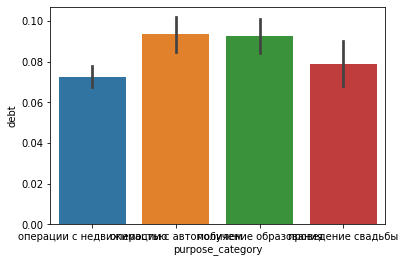

In [28]:


print(data.groupby('purpose_category').agg({'debt': ['count', 'sum']})) #выведем количество кредитов и сумму кредитов с просрочкой по категориям

print(data.groupby('purpose_category')['debt'].mean().sort_values()) #выведем %% отношение кредитов с просрочкой к общему количеству кретиов в категорияях по наличию детей

seaborn.barplot(x = data['purpose_category'], y = data['debt'])


**Вывод:** по общему количеству кредитов в целевом назначении преоблдают кредиты по операциям с недвижимостью, далее операции с  автомобилем, получение образования и проведение свадьбы. Наименьшая доля просроек наблюдается у кредитов с целевым назначением операции с недвижимостью -7,3%. Кредиты на такие цели  как правило берутся осознанно тщательно рассчитывая сумму и возможность обслуживать задолженность. Далее с долей просрочек 7,9% идут кредиты на проведение свадьбы. Что частино может объясняться тем что в большинстве случаев в качестве свадебного подарка превалируют деньги, то молодожены рассчитвают погасить кредит за счет подаренных денег. Получение образования по доле просрочек - 9,3%. Вчершним студентам не всегда удается сразу после получения образования получить высокооплачиваемую работу и за счет этого своевременного погащать обязательства. Наибольшая доля просрочек в категории на операции с автомобилем - 9,3%. Автомобиль требует дополнительнх расхдов на содержание, обслуживание, страхование. Эти расходы не всегда учитываются при приобретеии и может привести к наличию прочроек из-за дополнительных непредвиденных расходах. Присвоим каждой категоии рейтинг.

In [29]:
def rating_purpose_category(purpose_category):
    try:
        if purpose_category == 'операции с недвижимостью':
            return 4
        elif purpose_category == 'проведение свадьбы':
            return 3
        elif purpose_category == 'получение образования':
            return 2
        elif purpose_category == 'операции с автомобилем':
            return 1
        elif children == 'нет категории':
            return 0
    except:
        pass 
data['rating_purpose_category'] = data['purpose_category'].apply(rating_purpose_category) 

#print(data.head(5))

#### Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* вероятные причины пропусков могут быть непреднамеренным сокрытием требуемых пааметров при заполнении заявки пользователем - получателем кредита, либо данные могут отсутствовать из-за ошибки выгрузки. Если обратить внимание на то, чт количество пропущенных строк по обоим параметрам одинаковое, возможной причиной пропусков могут быть отсутствие необходимости их заполнения либо иной канал прихода клиентов и данные либо не хаоплняются в рамках продукта по этим каналам продаж либо эти данные могут находиться в других базах данных

## Общий вывод.

Напишите ваш общий вывод. 
На основе проведенного анализа по разным категориям можно представить вероятный наиболее часто встречающийся тип клиента, а на основе доли просрочек наиболее благоприятный и неблагоприятный по возвратности образ клиента. 
По наиболее часто встречающийся тип клиента: на операции с недвижимостью, с доходом 50001-200000, женат/замужем, без детей.

Наиболее приоритетный образ клиента на основе полученнных минимальных расчетных показетелй наличия просроченых кредитов 
выступает: кредиты на операции с недвижимостью (7,3% просроченной задолженности), с доходом в категории B - 200001-1000000 (7,1% просроченной задолженности) (выборка в категории D 30001-50000 значительно меньше всего 349 креитов против 5014 в категории B и 15921 в категории C, чего недостаточно для формирования достоверного результата по возвратности), вдовец/вдова (6,6% просроченной задолженности, далее по объему выборки и росту объема просроченных кредитов категория в разводе  и женат/замужем как близкая по объему выборки и следующей по доле просроченных кредитов категории, 7,1% и 7,6% соответственно просроченных кредитов), без детей с долей просрочки 7,5%.
Наименее ответственные клиенты предпоитают брать кредиты на операции с автомобилем - 9,3% просрочек, с уровнем доходов категории C (50001-200000) - 8.5% просроченных кредитов, не женатые/не замужние - 9,8% просрочек и с 4-мя детьми - доля просрочек по такой категории 9,8%
Т.к. "идеальные" клиенты на практике встречаются редко, то для каждого клиента возможно выстроить систему рейтингов рассчитанных на основе базы данных о клиентах, которая должна регулярно актуализироваться с пересчетом ретингов по категориям.(Как правило основой являются категория назначения кредита и уже от этого устанавливается внутренний рейтинг, но в нашем случае мы этого делать не будем, ограничимся расчетом общего рейтинга) 

